In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageOps

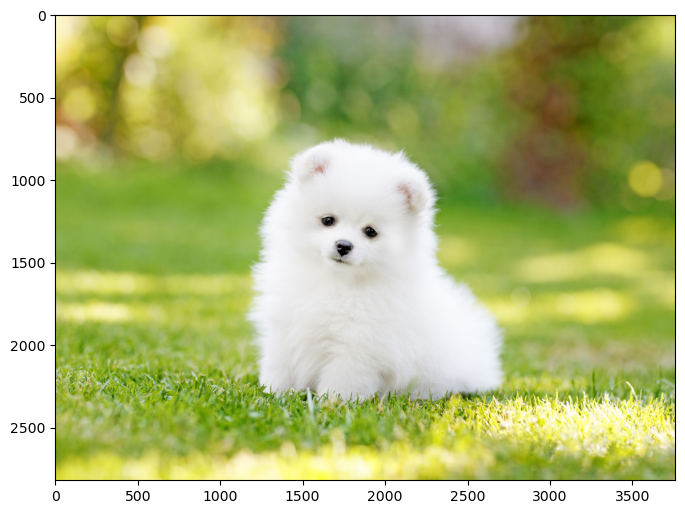

In [3]:
#reading the image

Img = np.array(Image.open("D://GUVI/Dog.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(Img)

In [5]:
#To view the details of the image
print('# 0f dimension:',Img.ndim)  #dimension of the shape
print('Img shape:',Img.shape)#Shape of the image
print("Dtype:",Img.dtype)
print(Img[20,20])#pixel value at[R,G,B]
print(Img[:,:,2].min())# min pixel value at channel B

# 0f dimension: 3
Img shape: (2820, 3760, 3)
Dtype: uint8
[252 247 205]
0


In [6]:
#saving the image from the Scratch
path = "D://GUVI/Dog_1.jpg"
pil_img = Image.fromarray(Img)
pil_img.save(path)#to save the image from ndarray
#pil_img.rotate() method to rotate and save the image

Text(0.5, 1.0, 'rotated')

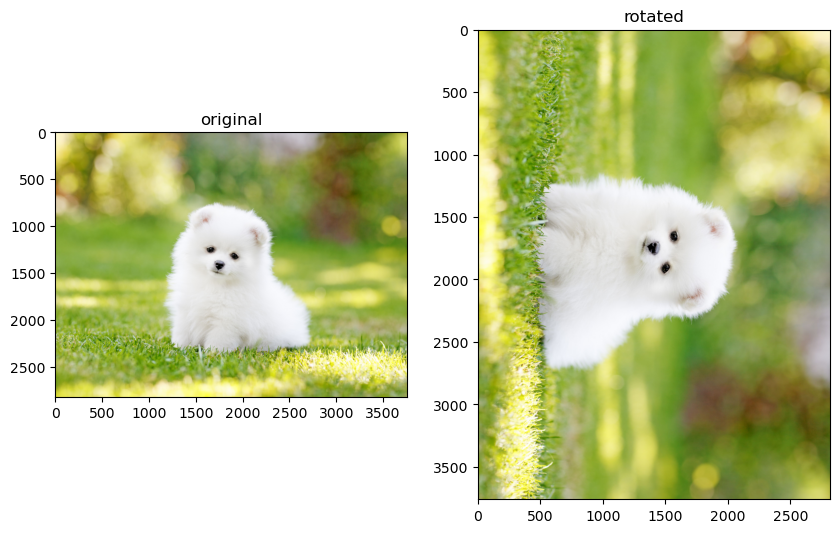

In [11]:
#Transposing the image to y-axis
degrees = 90
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(Img)
plt.title("original")
img0 = Img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

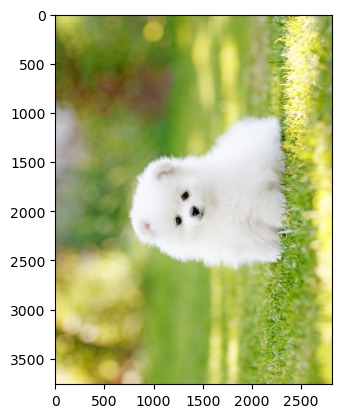

In [12]:
plt.imshow(np.rot90(Img))

Text(0.5, 1.0, 'Negative of RGB image')

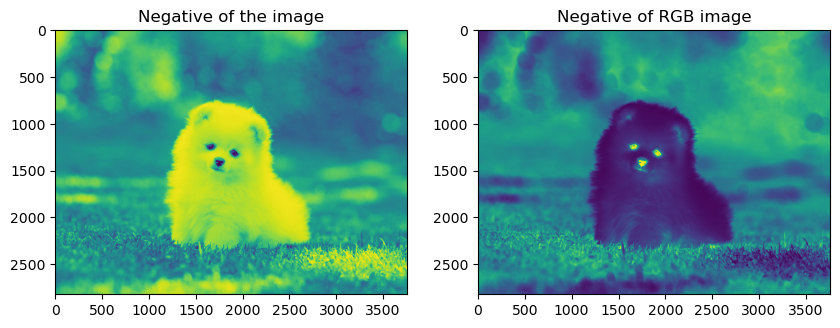

In [14]:
#Negative of the image
fig = plt.figure(figsize = (10,10))
img_grey = Img.sum(2) / (255*3) # 255*3 because we add along channel axis prevoiusly
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of the image')
img_N = 255 -img_grey
fig.add_subplot(1 ,2 ,2)
plt.imshow(img_N)
plt.title('Negative of RGB image')

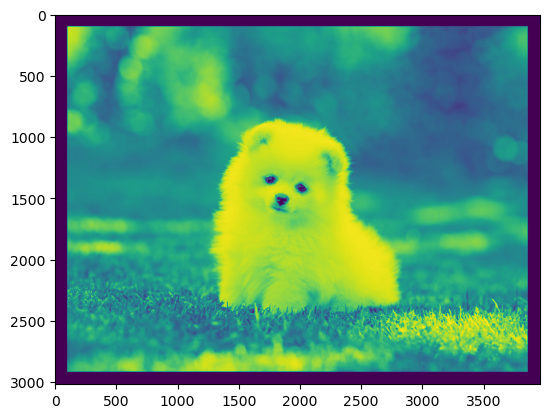

In [16]:
#To add black pad around the image
img_grey = Img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode = 'constant')
plt.imshow(img0)

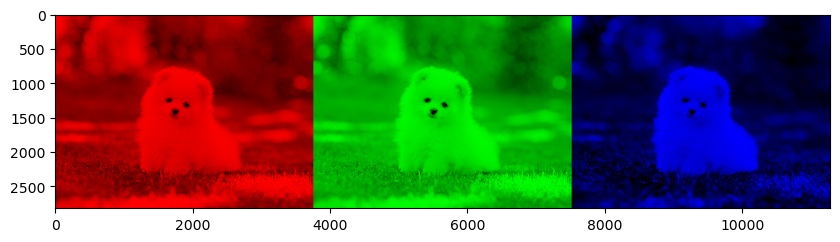

In [18]:
#Visualizing the RGB channels
img_R,img_G,img_B = Img.copy(),Img.copy(),Img.copy()
img_R[:,:,(1,2)] = 0 
img_G[:,:,(0,2)] = 0
img_B[:,:,(0,1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)

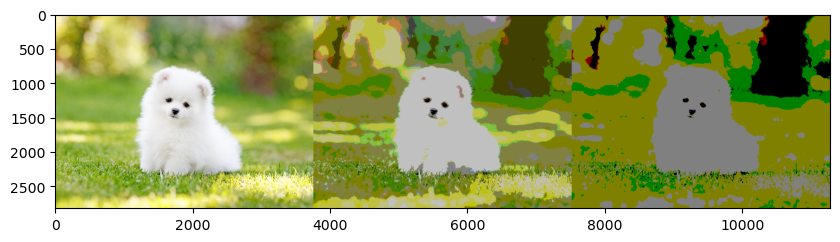

In [19]:
#COLOUR REDUCTION

img_0 = (Img // 64) * 64
img_1 = (Img // 128) * 128
img_all = np.concatenate((Img,img_0,img_1), axis =1)
plt.figure(figsize=(10,10))
plt.imshow(img_all)

Text(0.5, 1.0, 'Trimmed')

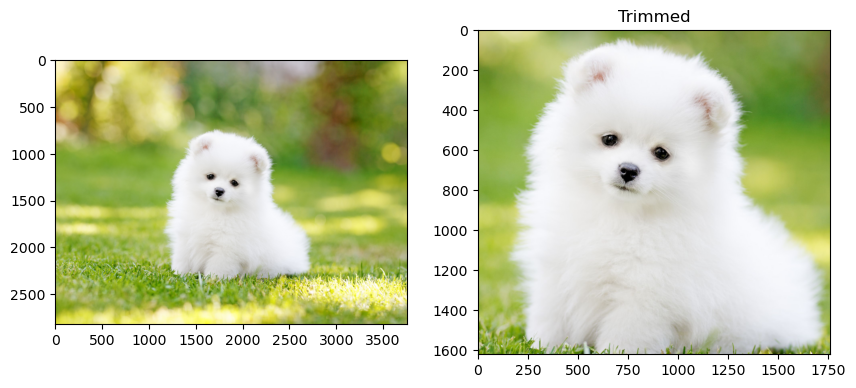

In [20]:
#Trim image
fig = plt.figure(figsize =(10,10))
fig.add_subplot(1 ,2 , 1)
plt.imshow(Img)
Img0 = Img[700:-500,1000:-1000,:]
fig.add_subplot(1 ,2 , 2)
plt.imshow(Img0)
plt.title('Trimmed')

Text(0.5, 1.0, 'Pasted with slice')

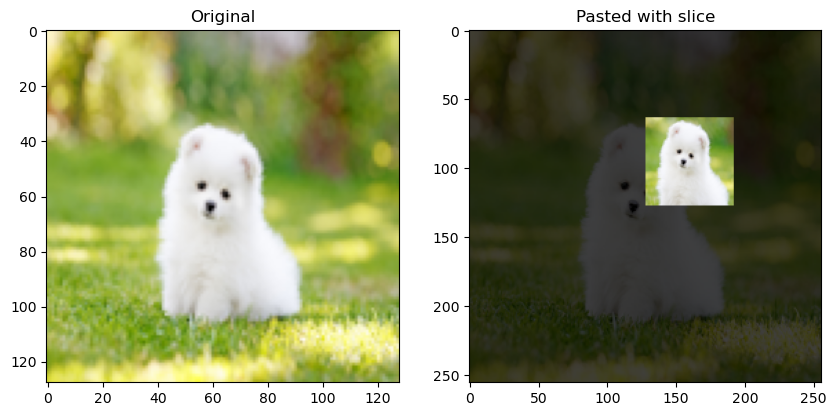

In [24]:
#pasting with slice
src = np.array(Image.open("D://GUVI/Dog.jpg").resize((128, 128)))
dst = np.array(Image.open("D://GUVI/Dog.jpg").resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')


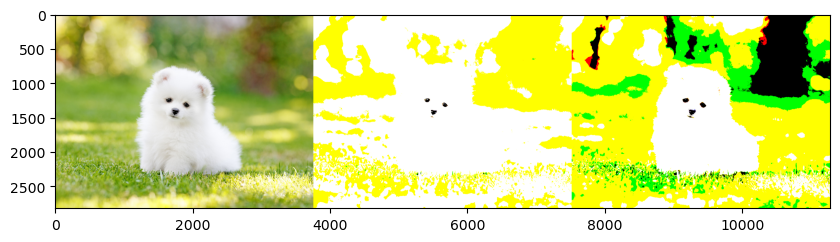

In [25]:
#Binarizing the image using numpy
img_64 = (Img > 64) * 255
img_128 = (Img > 128) * 255
fig = plt.figure(figsize=(10,10))
img_all = np.concatenate((Img,img_64,img_128), axis=1)
plt.imshow(img_all)

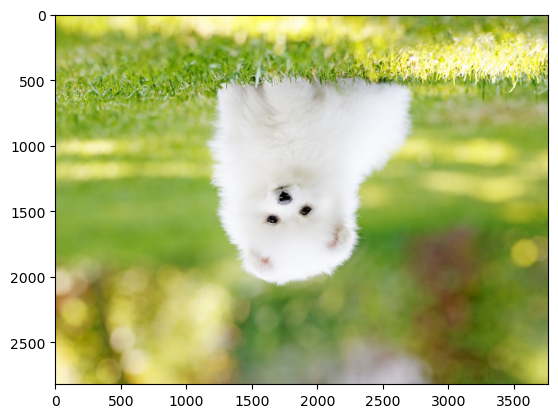

In [26]:
#flip Image
Img0 = Img.copy()
for i in range(Img0.shape[0] // 2):
    c = Img0[i, :, :].copy()
    Img0[i, :, :] = Img0[Img0.shape[0]- i - 1, :, :]
    Img0[Img0.shape[0]- i - 1, :, :] = c
plt.imshow(Img0)    
    

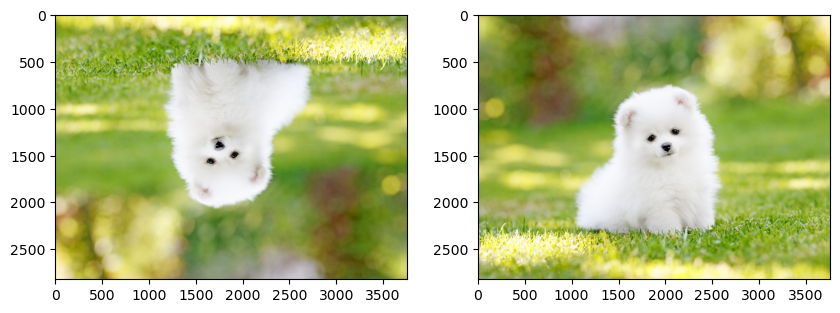

In [27]:
#->>np.flipud() : [up/down]flips over x-axis

#->>np.fliplr() : [left/right]flips over y_axis
#alternate method:

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(np.flipud(Img))
fig.add_subplot(1,2,2)
plt.imshow(np.fliplr(Img))


uint8


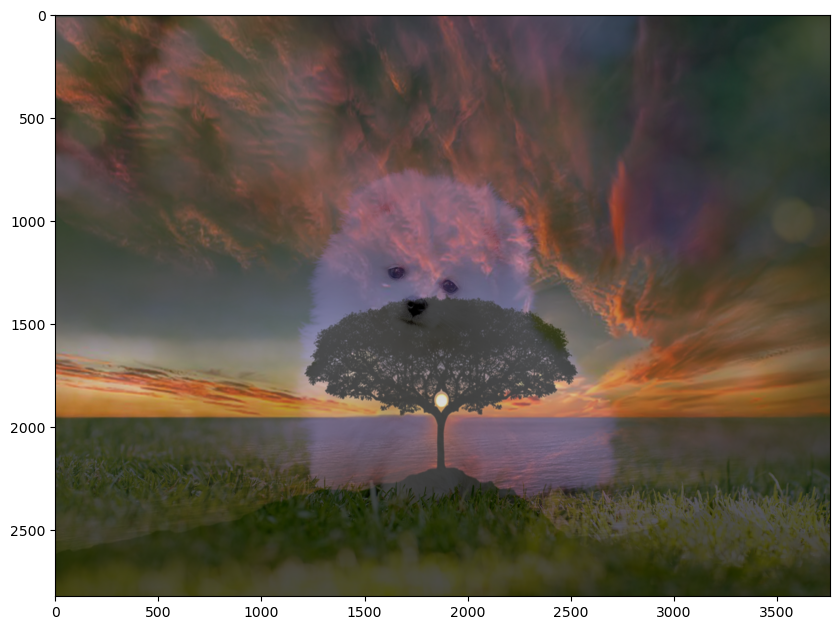

In [28]:
#Blending two images

Img1 = np.array(Image.open("D://GUVI/Tree.jpg").resize(Img.shape[1::-1]))
print(Img.dtype)
#uint8
dst = (Img * 0.3 + Img1 * 0.6).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(dst)

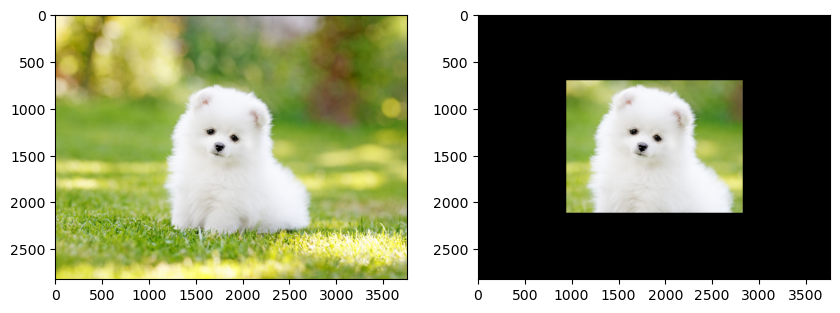

In [29]:
#masking image 

ones = np.ones((Img.shape[0] // 2, Img.shape[1] // 2, 3))
zeros = np.zeros(((Img.shape[0] // 4, Img.shape[1] // 4, 3)))
zeros_mid = np.zeros(((Img.shape[0] // 2, Img.shape[1] // 4, 3)))
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
mask = np.concatenate((up, middle, down), axis=0)
mask = mask / 255
img0 = mask * Img
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(Img)
fig.add_subplot(1, 2, 2)
plt.imshow(img0)

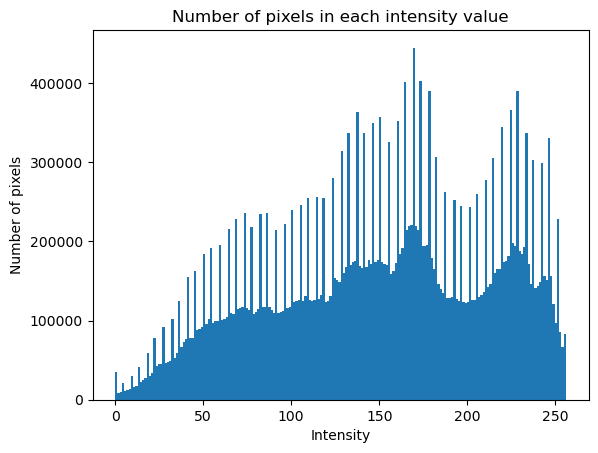

In [30]:
#Histogram For Pixel Intensity
img_flat = Img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()